Task 4: Predicting Insurance Claim Amounts

In [104]:
#Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

In [5]:
# Load dataset:

df = pd.read_csv("Medical Cost.csv")
print(df.columns) 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
# Preview dataset structure:

print(df.shape)
df.head(15)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


1. Handling Missing Values:

In [7]:
# Show missing values:

print("Missing Values:\n",df.isnull().sum())

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


2. Encode Categorical Features:

In [ ]:
#1st: sex → label encode
#2nd: smoker → label encode

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])         # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])   # yes=1, no=0

In [ ]:
#3rd: region → one-hot encode

df = pd.get_dummies(df, columns=['region'], drop_first=True)

3. Advanced Visualizations:

a) BMI vs Charges

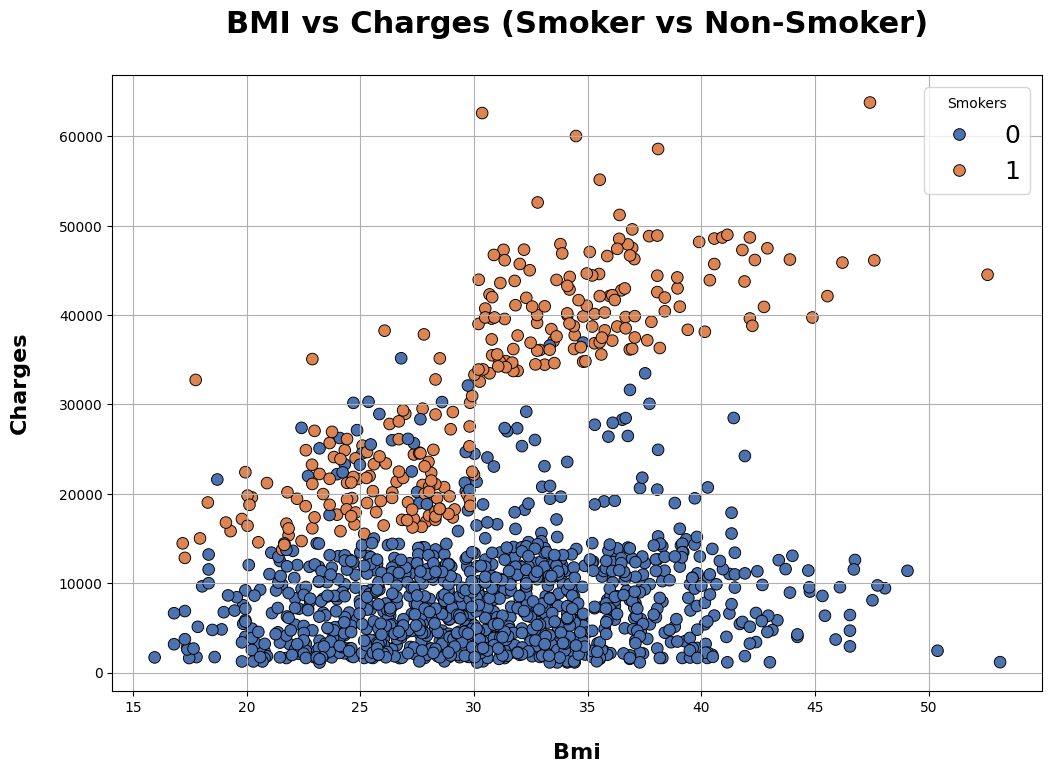

In [ ]:
#1st: Scatter Plot:

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df, x='bmi', y='charges', hue='smoker', palette='deep',
        s=70,  # Bubble size
       edgecolor='black')
plt.title("BMI vs Charges (Smoker vs Non-Smoker)\n", fontsize=22, fontweight='bold')
plt.xlabel("\nBmi", fontsize=16, fontweight='bold')
plt.ylabel("Charges\n", fontsize=16, fontweight='bold')
plt.legend(title="Smokers", loc='upper right', fontsize='18')
plt.grid(True)
plt.show()

b) Age vs Charges

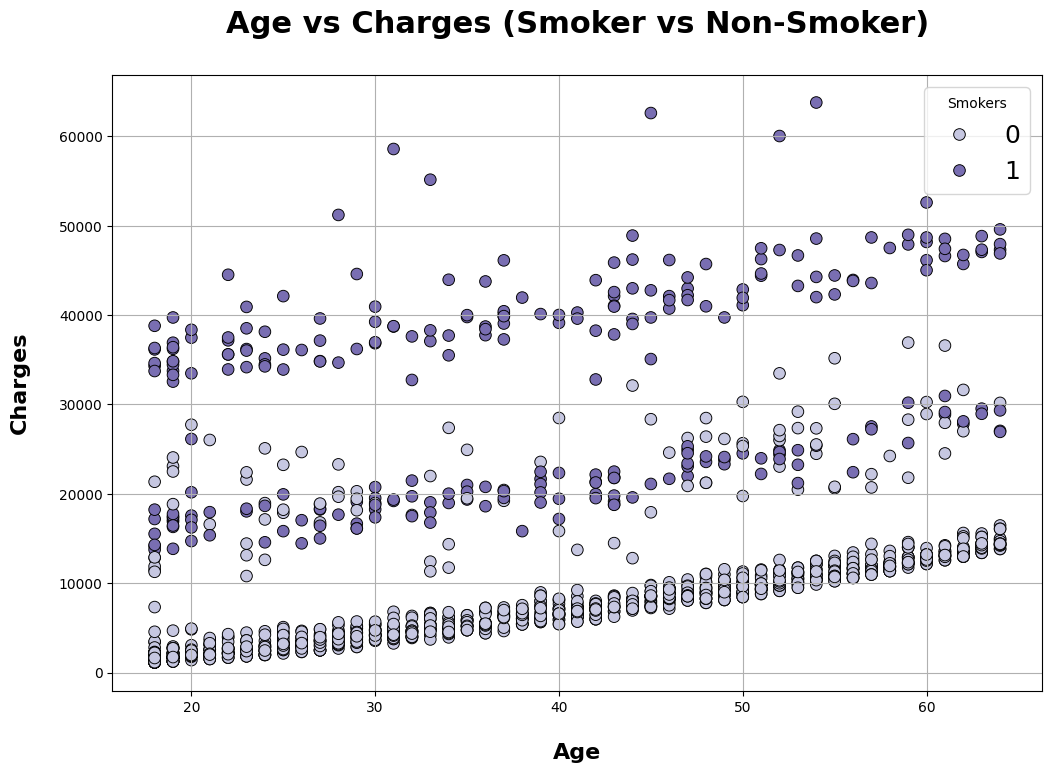

In [ ]:
#2nd: Scatter Plot:

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df, x='age', y='charges', hue='smoker', palette='Purples',
        s=70,  # Bubble size
       edgecolor='black')
plt.title("Age vs Charges (Smoker vs Non-Smoker)\n", fontsize=22, fontweight='bold')
plt.xlabel("\nAge", fontsize=16, fontweight='bold')
plt.ylabel("Charges\n", fontsize=16, fontweight='bold')
plt.legend(title="Smokers", loc='upper right', fontsize='18')
plt.grid(True)
plt.show()

c) Feature Correlation

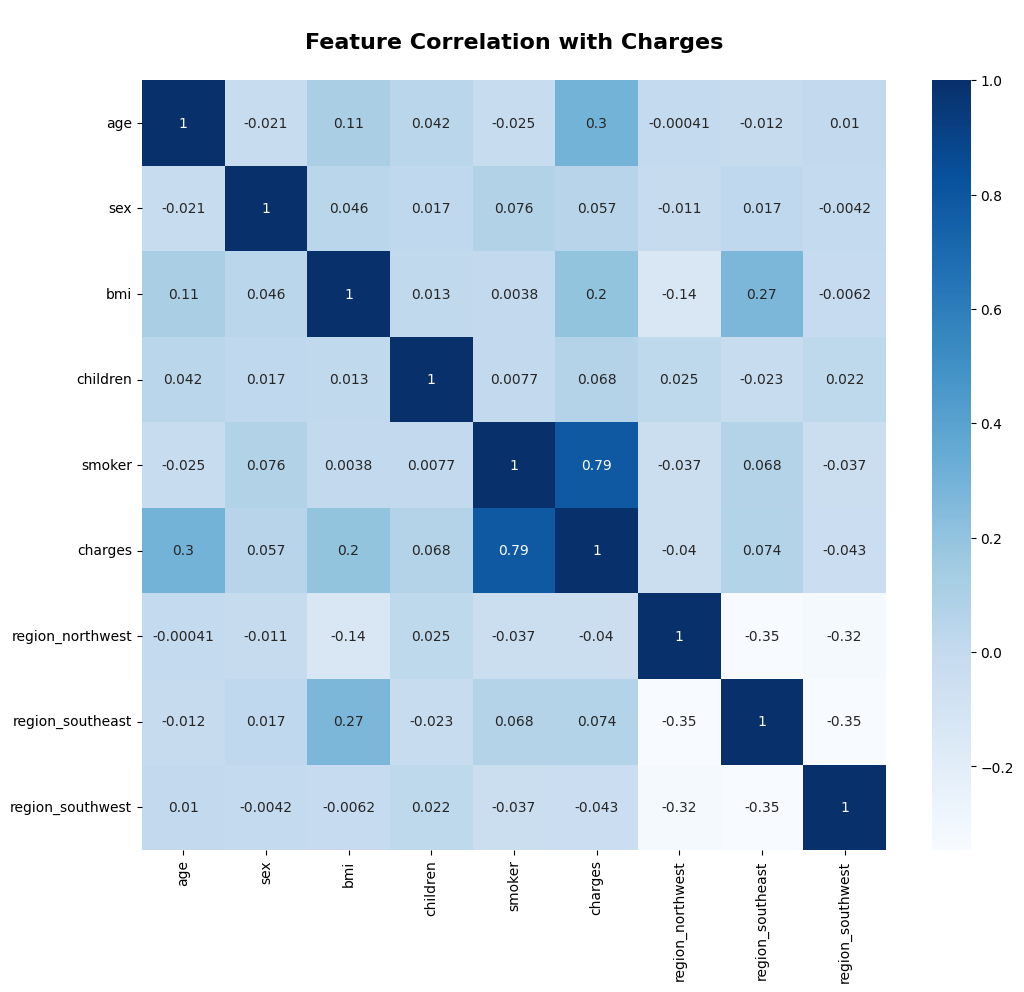

In [99]:
#3rd: Heatmap:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("\nFeature Correlation with Charges\n", fontsize='16', fontweight='bold')
plt.show()

 4. Prepare Model Inputs

In [100]:
X = df.drop('charges', axis=1)
y = df['charges']

5. Train/Test Split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

6. Train Linear Regression Model

In [106]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

7.  Model Evaluation – MAE & RMSE

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For Mean Error and Root mean Error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("\nRoot Mean Squared Error (RMSE):", round(rmse, 2))

Mean Absolute Error (MAE): 4181.19

Root Mean Squared Error (RMSE): 5796.28


8. Actual vs Predicted Plot

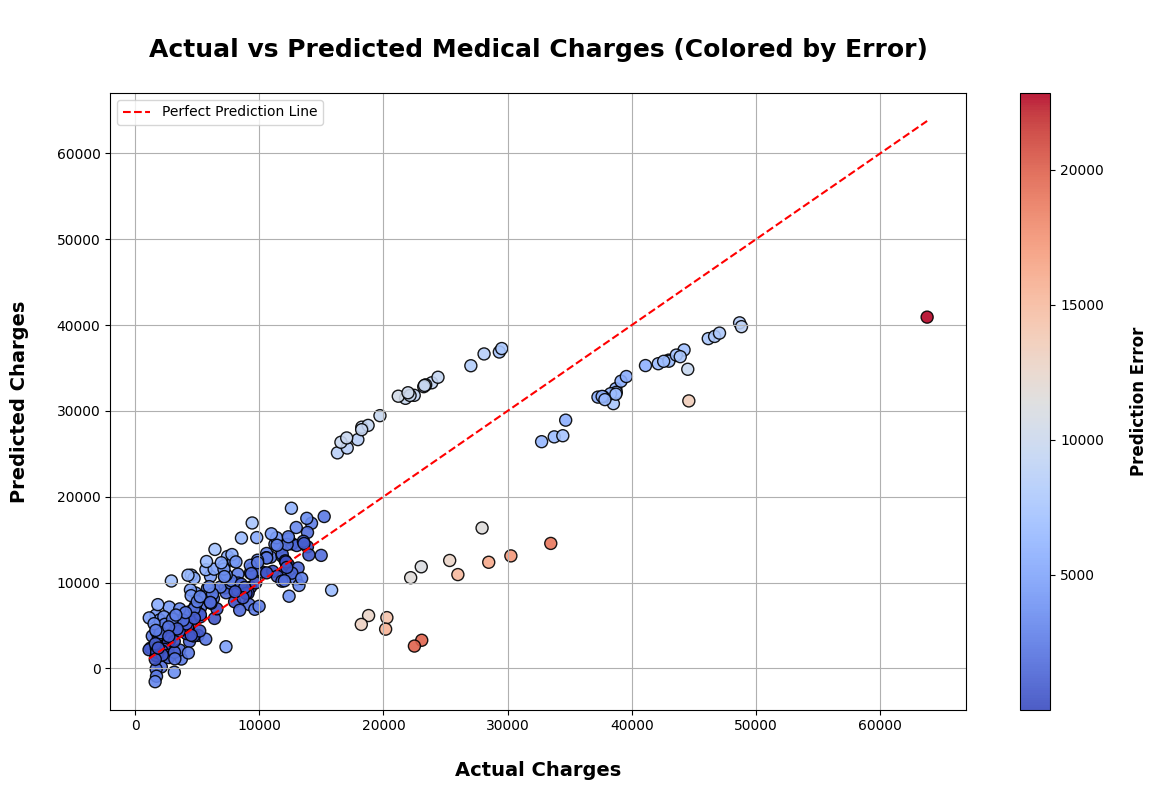

In [179]:
error = abs(y_test - y_pred)

plt.figure(figsize=(12,8))
scatter = plt.scatter(y_test, y_pred, c=error, cmap='coolwarm', alpha=0.9, s=75, edgecolor='black')
plt.xlabel("\nActual Charges", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Charges\n", fontsize=14, fontweight='bold')
plt.title("\nActual vs Predicted Medical Charges (Colored by Error)\n", fontsize=18, fontweight='bold')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")

cbar = plt.colorbar(scatter)
cbar.set_label("\nPrediction Error", fontsize=12, fontweight='bold')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
